In [173]:
import numpy as np
import matplotlib.pyplot as plt
import  matplotlib.cm as cm
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [174]:
df = pd.read_csv('default_features_1059_tracks.txt', header=None )
df.to_numpy()
df

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.399577,0.310805,-0.039326,-0.111546,0.304586,-0.943453,0.114960,-0.335898,0.826753,-0.393786,...,-0.558717,0.998897,-0.106835,1.526307,0.646088,2.467278,1.867699,1.719302,-6.17,35.74
1055,1.640386,1.306224,0.192745,-1.816855,-1.311906,-2.128963,-1.875967,0.094232,-1.429742,0.873777,...,0.223143,-0.032425,0.226782,0.182107,0.517466,1.126762,2.220671,4.422651,11.55,104.91
1056,-0.772360,-0.670596,-0.840420,-0.832105,0.277346,1.152162,0.241470,0.229092,0.019036,-0.068804,...,0.449239,-0.965270,-0.590039,-0.804297,0.044170,-0.718175,-0.983640,-0.573822,41.33,19.80
1057,-0.996965,-1.099395,3.515274,-0.508185,-1.102654,0.192081,0.069821,0.264674,-0.411533,0.501164,...,1.941398,1.769292,0.738616,1.240377,-0.546002,-0.137473,-0.781036,-0.832167,54.68,25.31


In [175]:
data = df.iloc[:,:68] # each row is a song
y = df.iloc[:,68:] # # latitude & longitude

In [176]:
 # The dataset was built from a personal collection of 1059 tracks covering 33 countries/area
NumClusters = 33
kmeans = KMeans(n_clusters=NumClusters , max_iter=600 )
kmeans = kmeans.fit(y)
labels = kmeans.predict(y)
centroids = kmeans.cluster_centers_
centroids

array([[ 3.5680e+01,  5.1410e+01],
       [ 3.4030e+01, -6.8500e+00],
       [ 1.3750e+01,  1.0048e+02],
       [-1.5750e+01, -4.7950e+01],
       [ 3.0030e+01,  3.1210e+01],
       [ 2.8610e+01,  7.7200e+01],
       [-3.5300e+01,  1.4912e+02],
       [ 1.7980e+01, -7.6800e+01],
       [ 3.9910e+01,  1.1638e+02],
       [-6.1700e+00,  3.5740e+01],
       [ 1.4660e+01, -1.7410e+01],
       [ 5.4680e+01,  2.5310e+01],
       [ 5.2500e+01, -1.2000e-01],
       [ 3.8000e+01,  2.3710e+01],
       [ 4.2860e+01,  7.4600e+01],
       [-6.1700e+00,  1.0682e+02],
       [ 2.3760e+01,  1.2100e+02],
       [ 3.5700e+01,  1.3971e+02],
       [ 9.0300e+00,  3.8740e+01],
       [ 1.2650e+01, -8.0000e+00],
       [ 4.1900e+01,  1.2480e+01],
       [ 1.9750e+01,  9.6100e+01],
       [ 3.6700e+01,  3.2100e+00],
       [ 3.9910e+01,  3.2830e+01],
       [ 3.3660e+01,  7.3160e+01],
       [ 4.1710e+01,  4.4780e+01],
       [ 1.7250e+01, -8.8760e+01],
       [ 1.4910e+01, -2.3510e+01],
       [ 4.1260e+01,

<Figure size 432x288 with 0 Axes>

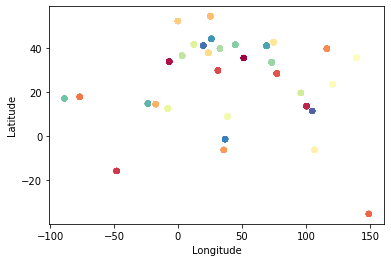

<Figure size 432x288 with 0 Axes>

In [177]:
cmap = cm.get_cmap("Spectral")
colors = [cmap(float(l) /NumClusters) for l in labels]
plt.scatter(y.iloc[:, 1], y.iloc[:, 0], c = colors, s=25)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.figure()

In [178]:
y = labels
X_train, X_test, y_train, y_test = train_test_split(data, y,test_size = 0.30)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (741, 68)
Testing set shape: (318, 68)


In [179]:
from sklearn.preprocessing import StandardScaler

scaler_data = pd.DataFrame(StandardScaler().fit_transform(data),
columns=df.columns[0:68])

scaled_Xtrain = StandardScaler().fit_transform(X_train)
scaled_Xtest =  StandardScaler().fit_transform(X_test)

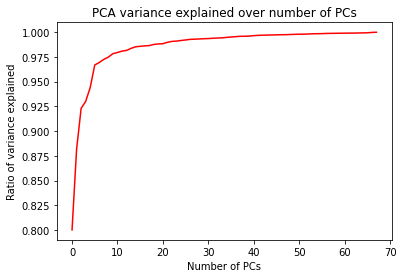

In [180]:
from sklearn.decomposition import PCA
pca = PCA(n_components=68) #
principalComponents = pca.fit_transform(scaler_data)
a= [1- i for i in pca.explained_variance_ratio_]
#????

X_scaler = StandardScaler().fit(data)
PCA_var = PCA(n_components = X_scaler.transform(data).shape[1])
PCA_var.fit(X_scaler.transform(data))
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

plt.figure()
plt.title("PCA variance explained over number of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Ratio of variance explained")
plt.plot(range(0, len(a), 1), a, c = 'r')
plt.show()


In [181]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"Random Forest accuracy:{metrics.accuracy_score(y_test,rf_pred)}")
#print(confusion_matrix(y_test, rf_pred))

Random Forest accuracy:0.4371069182389937


In [182]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 10))
sel.fit(X_train, y_train)
# To see which features are important we can use get_support method on the fitted model.
Important_features = sel.get_support()
Important_features

array([False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False, False])

In [183]:
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

New_df = df.iloc[:,selected_feat] # data frame with only the selected features
New_df

28
Int64Index([ 2,  3,  4,  5,  8,  9, 11, 12, 14, 18, 19, 20, 21, 22, 23, 24, 34,
            35, 36, 37, 38, 51, 52, 54, 55, 56, 58, 59],
           dtype='int64')


,2,3,4,5,8,9,11,12,14,18,...,36,37,38,51,52,54,55,56,58,59
0,2.911583,0.984049,-1.499546,-2.094097,1.849122,-0.425598,1.728885,1.788986,-1.109353,6.007710,...,0.317270,-0.130580,2.048282,1.319729,1.094839,-0.895371,-0.734962,0.441859,-0.944584,-0.043610
1,-0.603646,0.497745,0.874036,0.290280,0.432062,-0.093963,0.407297,-0.034418,-1.587712,0.549205,...,-0.402494,0.058298,-0.221967,1.627259,1.989545,-0.176835,0.406589,-0.623764,-0.082645,-0.947933
2,-0.788035,1.214351,-0.907214,0.880213,-0.901869,-1.701574,-0.791393,-1.667463,-0.151747,-0.463102,...,-0.291778,-0.274901,-0.351297,-0.654047,0.264883,-0.405171,0.170239,0.067260,-0.797954,-0.556109
3,2.058215,0.716328,-0.011393,0.805396,0.692847,0.052377,0.429205,0.576029,0.519513,0.001966,...,2.535289,0.537780,0.190260,2.301748,2.547275,-0.179182,0.112038,0.983122,-0.805626,0.166616
4,-0.279214,0.083456,1.049331,-0.869295,-0.872639,1.147483,1.824638,-0.861848,-0.966604,-0.044704,...,-0.324638,-0.089385,-0.186612,0.984157,0.279686,-0.078594,-0.250279,-1.169305,-0.180181,-0.500785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,-0.039326,-0.111546,0.304586,-0.943453,0.826753,-0.393786,-0.399561,-0.902700,0.755288,0.533387,...,0.112375,-1.306445,-0.203477,-0.081286,-0.015762,0.119565,1.489708,-0.440270,-0.406932,0.425577
1055,0.192745,-1.816855,-1.311906,-2.128963,-1.429742,0.873777,-0.681298,0.547811,-0.687724,-0.726096,...,-0.410138,-0.732524,1.261700,-0.636212,-1.622788,0.260389,2.550315,2.143525,-0.467663,0.723125
1056,-0.840420,-0.832105,0.277346,1.152162,0.019036,-0.068804,0.636144,-0.392233,0.361104,-0.685403,...,-0.340651,-0.942980,-0.993363,0.087498,0.059951,0.284195,0.718086,-0.096274,-0.413309,-0.287753
1057,3.515274,-0.508185,-1.102654,0.192081,-0.411533,0.501164,-0.178807,-1.071450,-0.039610,-0.724768,...,4.228199,0.055216,0.449377,-0.578250,-0.501226,-0.130229,-1.021024,-0.846366,4.288337,1.565493


In [184]:
NX_train, NX_test, Ny_train, Ny_test = train_test_split(New_df, y,test_size = 0.30)
print(f"Training set shape: {NX_train.shape}")
print(f"Testing set shape: {NX_test.shape}")

Nrf = RandomForestClassifier(n_estimators=100).fit(NX_train, Ny_train)
Nrf_pred = Nrf.predict(NX_test)
print(f"Random Forest accuracy:{metrics.accuracy_score(Ny_test,Nrf_pred)}")

Training set shape: (741, 28)
Testing set shape: (318, 28)
Random Forest accuracy:0.4528301886792453
